In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# Load the Iris dataset
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### EXploratory Analysis

In [8]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


<Axes: >

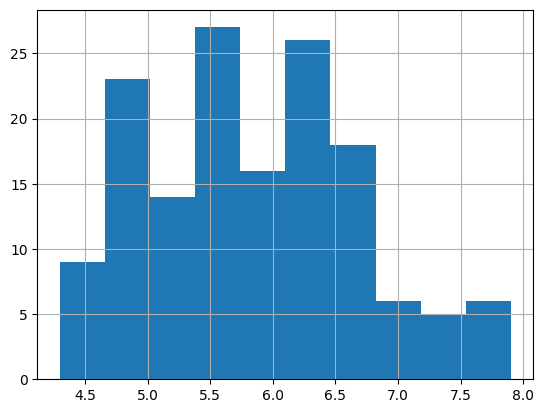

In [9]:
df['sepal length (cm)'].hist()

<Axes: >

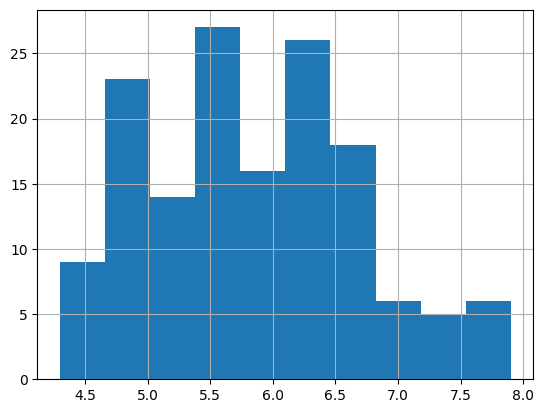

In [10]:
df['sepal length (cm)'].hist()

<Axes: >

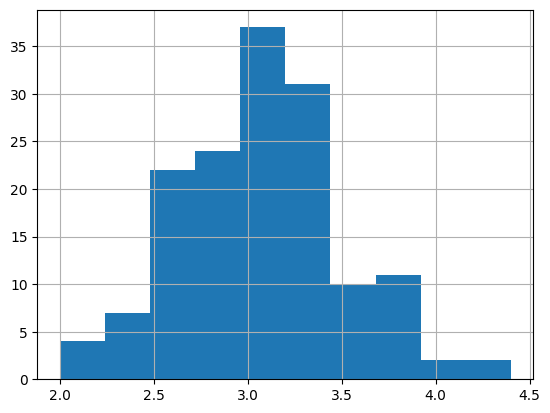

In [11]:
df['sepal width (cm)'].hist()

<Axes: >

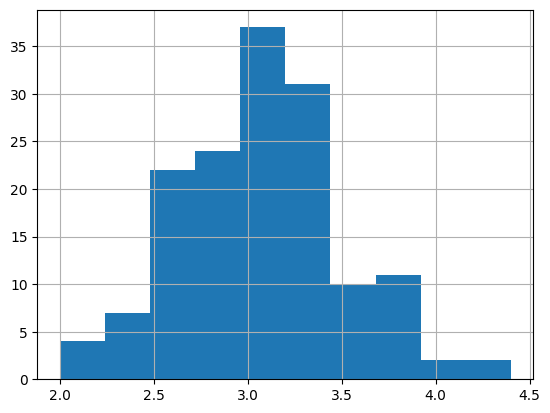

In [12]:
df['sepal width (cm)'].hist()

<Axes: >

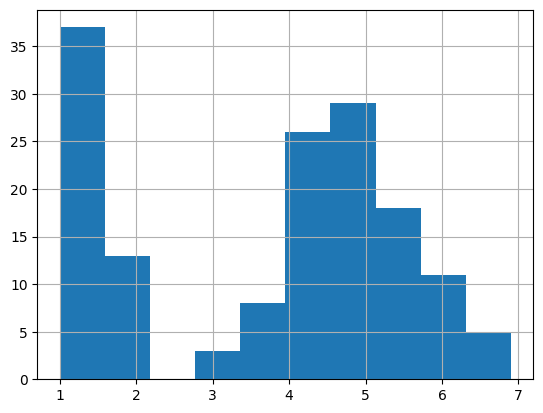

In [13]:
df['petal length (cm)'].hist()

<Axes: >

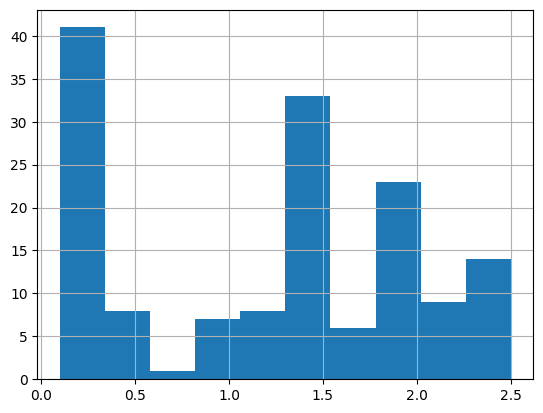

In [14]:
df['petal width (cm)'].hist()

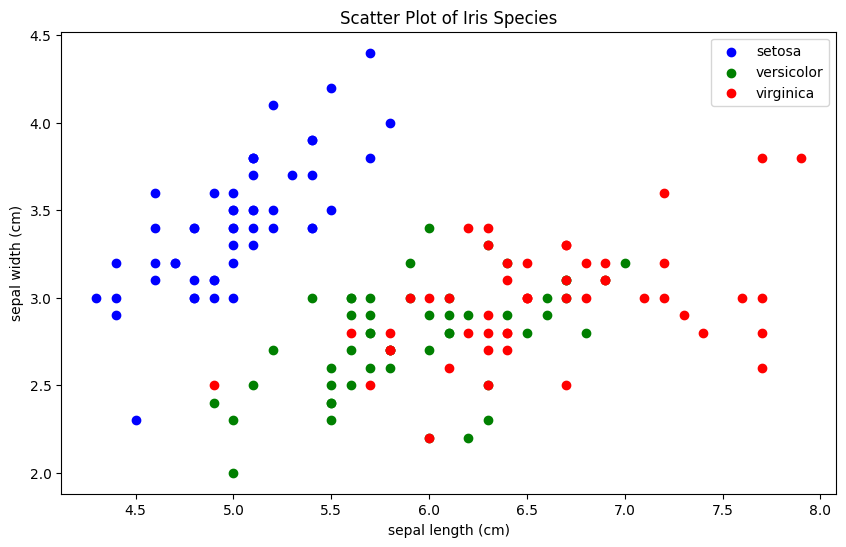

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Get the data and target labels
data = iris.data
target = iris.target
target_names = iris.target_names

# Set custom colors for each species
colors = ['blue', 'green', 'red']

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(target_names)):
    plt.scatter(data[target == i, 0], data[target == i, 1], label=target_names[i], color=colors[i])

# Add labels and legend
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter Plot of Iris Species")
plt.legend()

# Show the plot
plt.show()


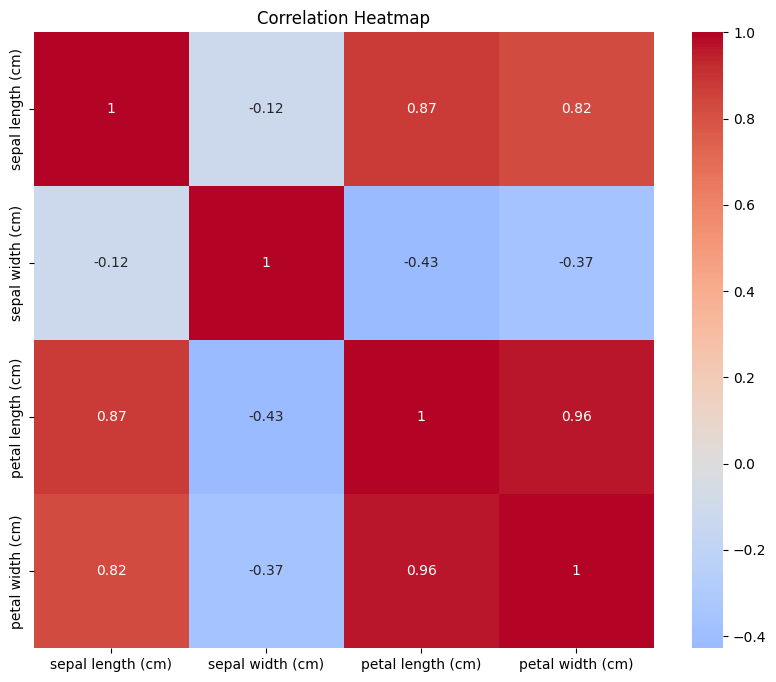

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()



### GRID SEARCH CV

In [17]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            
        }
    }     
}

scores = []

In [18]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [19]:
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

                     model  best_score                best_params
0                      svm    0.980000  {'C': 1, 'kernel': 'rbf'}
1            random_forest    0.966667        {'n_estimators': 5}
2      logistic_regression    0.966667                   {'C': 5}
3     naive_bayes_gaussian    0.953333                         {}
4  naive_bayes_multinomial    0.953333                         {}
5            decision_tree    0.966667      {'criterion': 'gini'}


From the output, the best-performing model based on the highest best_score is the SVM (Support Vector Machine) model with the following parameters:

Model: SVM
Best Score: 0.98
Best Parameters: {'C': 1, 'kernel': 'rbf'}
An accuracy score of 0.98 indicates that the SVM model with these parameters achieved the highest accuracy on the Iris dataset within the cross-validation process.

## Load Iris Dataset

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
x = iris.data
y = iris.target

### Split data into train and test part

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =4)
x_train

array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5. , 1.7],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.2, 5.7, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.6, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 3

In [27]:
x_test

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2

In [28]:
y_train

array([0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2])

In [29]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

### svm Model

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

In [32]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='auto')  

In [34]:
# Train the model on the training data
svm_model.fit(x_train, y_train)

SVC(C=1, gamma='auto')

In [35]:
# Make predictions on the test data
y_pred = svm_model.predict(x_test)

In [36]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 100.0


In [37]:
# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [38]:
# Get the class names and their counts
class_names = iris.target_names
class_counts = {class_names[i]: (y_test == i).sum() for i in range(len(class_names))}
class_counts

{'setosa': 19, 'versicolor': 13, 'virginica': 13}

In [39]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
print(f"Accuracy Score: {accuracy:.2%}")
print(f"Class Counts: {', '.join([f'{name}-{count}' for name, count in class_counts.items()])}")

Accuracy Score: 100.00%
Class Counts: setosa-19, versicolor-13, virginica-13


### random_forest

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

In [43]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=10)

In [45]:
# Train the model on the training data
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
# Make predictions on the test data
y_pred = random_forest_model.predict(x_test)

In [47]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 100.0


In [48]:
# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [49]:
# Get the class names and their counts
class_names = iris.target_names
class_counts = {class_names[i]: (y_test == i).sum() for i in range(len(class_names))}
class_counts

{'setosa': 19, 'versicolor': 13, 'virginica': 13}

In [50]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [51]:
print(f"Accuracy Score: {accuracy:.2%}")
print(f"Class Counts: {', '.join([f'{name}-{count}' for name, count in class_counts.items()])}")

Accuracy Score: 100.00%
Class Counts: setosa-19, versicolor-13, virginica-13


### logistic_regression	

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

In [57]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [58]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', multi_class='auto') 

In [59]:
# Train the model on the training data
logreg_model.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

In [60]:
# Make predictions on the test data
y_pred = logreg_model.predict(x_test)

In [61]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 97.77777777777777


In [62]:
# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [63]:
# Get the class names and their counts
class_names = iris.target_names
class_counts = {class_names[i]: (y_test == i).sum() for i in range(len(class_names))}
class_counts

{'setosa': 19, 'versicolor': 13, 'virginica': 13}

In [64]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [65]:
print(f"Accuracy Score: {accuracy:.2%}")
print(f"Class Counts: {', '.join([f'{name}-{count}' for name, count in class_counts.items()])}")

Accuracy Score: 97.78%
Class Counts: setosa-19, versicolor-13, virginica-13


### decision_tree	

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

In [68]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [69]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier() 

In [70]:
# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
# Make predictions on the test data
y_pred = decision_tree_model.predict(x_test)

In [72]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 100.0


In [73]:
# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [74]:
# Get the class names and their counts
class_names = iris.target_names
class_counts = {class_names[i]: (y_test == i).sum() for i in range(len(class_names))}
class_counts

{'setosa': 19, 'versicolor': 13, 'virginica': 13}

In [75]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [76]:
print(f"Accuracy Score: {accuracy:.2%}")
print(f"Class Counts: {', '.join([f'{name}-{count}' for name, count in class_counts.items()])}")

Accuracy Score: 100.00%
Class Counts: setosa-19, versicolor-13, virginica-13


### naive_bayes_gaussian

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

In [79]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [80]:
# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

In [81]:
# Train the model on the training data
naive_bayes_model.fit(x_train, y_train)

GaussianNB()

In [82]:
# Make predictions on the test data
y_pred = naive_bayes_model.predict(x_test)

In [83]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 97.77777777777777


In [84]:
# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [85]:
# Get the class names and their counts
class_names = iris.target_names
class_counts = {class_names[i]: (y_test == i).sum() for i in range(len(class_names))}
class_counts

{'setosa': 19, 'versicolor': 13, 'virginica': 13}

In [86]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [87]:
print(f"Accuracy Score: {accuracy:.2%}")
print(f"Class Counts: {', '.join([f'{name}-{count}' for name, count in class_counts.items()])}")

Accuracy Score: 97.78%
Class Counts: setosa-19, versicolor-13, virginica-13


### 	naive_bayes_multinomial

In [88]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
# Load the Iris dataset
iris = load_iris()
x = iris.data
y = iris.target

In [90]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [91]:
# Initialize the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

In [92]:
# Train the model on the training data
naive_bayes_model.fit(x_train, y_train)

MultinomialNB()

In [93]:
# Make predictions on the test data
y_pred = naive_bayes_model.predict(x_test)

In [94]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 95.55555555555556


In [95]:
# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]


In [96]:
# Get the class names and their counts
class_names = iris.target_names
class_counts = {class_names[i]: (y_test == i).sum() for i in range(len(class_names))}
class_counts

{'setosa': 19, 'versicolor': 13, 'virginica': 13}

In [97]:
# Print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print(classification_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [98]:
print(f"Accuracy Score: {accuracy:.2%}")
print(f"Class Counts: {', '.join([f'{name}-{count}' for name, count in class_counts.items()])}")

Accuracy Score: 95.56%
Class Counts: setosa-19, versicolor-13, virginica-13
